Import libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

Load data

In [21]:
def load_dataset(filepath: str) -> pd.DataFrame:
    """
    Loads a dataset from a CSV file.

    Parameters:
    -----------
    filepath : str
        Path to the CSV file.

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing the loaded data.

    Example:
    --------
    >>> df = load_dataset('benin-malanville.csv')
    >>> df.head()
    """
    try:
        df = pd.read_csv(filepath)
        print(f"✅ Successfully loaded dataset: {filepath}")
        return df
    except FileNotFoundError:
        print(f"❌ File not found: {filepath}")
    except pd.errors.ParserError:
        print(f"❌ Error parsing the file: {filepath}")
    except Exception as e:
        print(f"❌ An unexpected error occurred: {e}")

# === Call the function === #
df = load_dataset('benin-malanville.csv')


✅ Successfully loaded dataset: benin-malanville.csv


In [22]:
def preview_data(df: pd.DataFrame, n: int = 5) -> pd.DataFrame:
    """
    Displays the first few rows of a DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to preview.

    n : int
        Number of rows to display (default is 5).

    Returns:
    --------
    pd.DataFrame
        The first `n` rows of the DataFrame.
    
    Example:
    --------
    >>> preview_data(df, n=3)
    """
    print(f"📄 Previewing the first {n} rows of the dataset:\n")
    return df.head(n)

# === Example use === #
preview_data(df)


📄 Previewing the first 5 rows of the dataset:



,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


Summary Statistics & Missing-Value Report

In [23]:
def show_statistical_summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Displays the statistical summary of numerical columns in the DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to summarize.

    Returns:
    --------
    pd.DataFrame
        A summary including count, mean, std, min, max, and quartiles.

    Example:
    --------
    >>> show_statistical_summary(df)
    """
    print("📊 Statistical Summary of Numerical Columns:\n")
    return df.describe()


show_statistical_summary(df)


📊 Statistical Summary of Numerical Columns:



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [24]:
def check_missing_values(df: pd.DataFrame) -> pd.Series:
    """
    Checks and displays the number of missing (NaN) values in each column of a DataFrame.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to check.

    Returns:
    --------
    pd.Series
        A series showing the count of missing values per column.

    Example:
    --------
    >>> check_missing_values(df)
    """
    missing_values = df.isna().sum()
    print("🧪 Missing Values in Each Column:\n")
    return missing_values


check_missing_values(df)



🧪 Missing Values in Each Column:



Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [25]:
def columns_with_high_missing(df: pd.DataFrame, threshold_ratio: float = 0.05) -> pd.Series:
    """
    Identifies columns in the DataFrame with more than a specified percentage of missing values.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to analyze.

    threshold_ratio : float
        The percentage threshold (default is 0.05 = 5%).

    Returns:
    --------
    pd.Series
        A series containing columns and counts of missing values exceeding the threshold.

    Example:
    --------
    >>> columns_with_high_missing(df)
    """
    threshold = threshold_ratio * len(df)
    missing_values = df.isna().sum()
    high_missing = missing_values[missing_values > threshold]

    print(f"⚠️ Columns with > {threshold_ratio*100:.1f}% missing values:\n")

    return high_missing

columns_with_high_missing(df)           # Default: 5%

⚠️ Columns with > 5.0% missing values:



Comments    525600
dtype: int64

In [26]:
def detect_outliers_zscore(df: pd.DataFrame, columns: list, threshold: float = 3.0) -> pd.DataFrame:
    """
    Detects outliers in specified numeric columns using the Z-score method.

    Parameters:
    -----------
    df : pd.DataFrame
        The dataset containing the columns to analyze.
    
    columns : list
        List of column names on which to compute Z-scores.

    threshold : float
        The Z-score threshold to consider a value as an outlier (default is 3.0).

    Returns:
    --------
    pd.DataFrame
        A DataFrame containing True (outlier) or False (not outlier) values for each cell.

    Example:
    --------
    >>> detect_outliers_zscore(df, ['GHI', 'DNI', 'WS'])
    """
    # Compute Z-scores for specified columns
    z_scores = df[columns].apply(stats.zscore)

    # Identify outliers where Z-score exceeds the threshold
    outliers = (z_scores.abs() > threshold)

    print(f"🔎 Outlier detection using Z-score (|Z| > {threshold}):")
    print(outliers.sum(), "\n")  # Summarize outliers per column

    return outliers


columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outliers_df = detect_outliers_zscore(df, columns_to_check)

🔎 Outlier detection using Z-score (|Z| > 3.0):
GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64 



In [27]:
def drop_outliers(df: pd.DataFrame, outliers: pd.DataFrame) -> pd.DataFrame:
    """
    Removes rows from the original DataFrame that contain any outliers.

    Parameters:
    -----------
    df : pd.DataFrame
        The original dataset.
    
    outliers : pd.DataFrame
        A boolean DataFrame (same shape as df[columns]) with True for outliers.

    Returns:
    --------
    pd.DataFrame
        A cleaned DataFrame with outlier rows removed.

    Example:
    --------
    >>> df_clean = drop_outliers(df, outliers)
    """
    # Drop any rows with at least one True in the outliers DataFrame
    df_cleaned = df[~outliers.any(axis=1)].copy()

    # Report how many rows were dropped
    dropped = len(df) - len(df_cleaned)
    print(f"🧹 Dropped {dropped} outlier rows. Remaining rows: {len(df_cleaned)}")

    return df_cleaned

df_clean = drop_outliers(df, outliers_df)


🧹 Dropped 7740 outlier rows. Remaining rows: 517860


In [28]:
def impute_missing_with_median(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Imputes missing values in the specified columns using the column median.

    Parameters:
    -----------
    df : pd.DataFrame
        The DataFrame to be cleaned.
    
    columns : list
        A list of column names to check and impute missing values.

    Returns:
    --------
    pd.DataFrame
        A DataFrame with missing values imputed in specified columns.

    Example:
    --------
    >>> df_clean = impute_missing_with_median(df_clean, ['GHI', 'DNI', 'DHI'])
    """
    df_imputed = df.copy()

    for col in columns:
        missing_count = df_imputed[col].isna().sum()
        if missing_count > 0:
            median_value = df_imputed[col].median()
            df_imputed[col].fillna(median_value, inplace=True)
            print(f"🧪 Imputed {missing_count} missing values in '{col}' with median: {median_value}")

    return df_imputed

columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_clean = impute_missing_with_median(df_clean, columns_to_check)


In [29]:
def export_cleaned_data(df_clean, folder='data', filename='benin_clean.csv'):
    """
    Export the cleaned DataFrame to a CSV file inside a specified folder.
    
    This function creates the target directory if it does not exist,
    then saves the DataFrame to a CSV file without the index.
    
    Parameters:
    -----------
    df_clean : pandas.DataFrame
        The cleaned DataFrame to be exported.
    folder : str, optional (default='data')
        The directory where the CSV file will be saved.
    filename : str, optional (default='benin_clean.csv')
        The name of the CSV file.
        
    Returns:
    --------
    None
    """
    os.makedirs(folder, exist_ok=True)
    path = os.path.join(folder, filename)
    df_clean.to_csv(path, index=False)

export_cleaned_data(df_clean)



Time Series Analysis

In [30]:
# # Parse timestamp
# df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# # df_clean = df_clean[(df_clean['GHI'] >= 0) & (df_clean['DNI'] >= 0) & (df_clean['DHI'] >=0 )]
# # df_clean['month'] = df_clean['Timestamp'].dt.month
# # monthly = df_clean.groupby('month')[['GHI','DNI','DHI']].mean()
# # monthly['GHI'].plot(label='Benin GHI')
# # plt.legend()
# # plt.title('Monthly Average GHI')
# # plt.xlabel('Month')
# # plt.ylabel('Irradatiance (W/m2)')
# # plt.show()
# # Set index
# df_clean.set_index('Timestamp', inplace=True)

# # # Plot
# df_clean[['GHI', 'DNI', 'DHI','Tamb']].plot(figsize=(15,5))
# plt.title("Tamb over Time")
# plt.ylabel("Value")
# plt.grid()
# plt.show()


In [31]:
def plot_time_series_bars(df, timestamp_col='Timestamp', variables=None, figsize=(12, 8)):
    """
    Plot bar charts of specified variables vs. a timestamp column from a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing the data.
    timestamp_col : str, optional (default='Timestamp')
        Name of the column representing time.
    variables : list of str, optional (default=['GHI', 'DNI', 'DHI', 'Tamb'])
        List of column names to plot against the timestamp.
    figsize : tuple, optional (default=(12, 8))
        Size of the figure.
        
    Returns:
    --------
    None
    """
    if variables is None:
        variables = ['GHI', 'DNI', 'DHI', 'Tamb']
    
    # Ensure timestamp column is datetime
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    # Create subplots for each variable
    n_vars = len(variables)
    fig, axs = plt.subplots(n_vars, 1, figsize=figsize, sharex=True)
    
    if n_vars == 1:
        axs = [axs]  # Make iterable
    
    for ax, var in zip(axs, variables):
        ax.bar(df[timestamp_col], df[var], width=0.01)  # width can be adjusted for readability
        ax.set_ylabel(var)
        ax.grid(True, linestyle='--', alpha=0.5)
    
    axs[-1].set_xlabel(timestamp_col)
    plt.tight_layout()
    plt.show()


plot_time_series_bars(df_clean, timestamp_col='Time', variables=['GHI', 'DNI', 'DHI', 'Tamb'])


KeyError: 'Time'

In [ ]:
# # Parse timestamp
# df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])

# # Set index
# df_clean.set_index('Timestamp', inplace=True)

# # Plot
# df_clean[['Tamb']].plot(figsize=(15,5))
# plt.title("Tamb over Time")
# plt.ylabel("Value")
# plt.grid()
# plt.show()


In [ ]:
print(df_clean.columns.tolist())

['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


Cleaning Impact

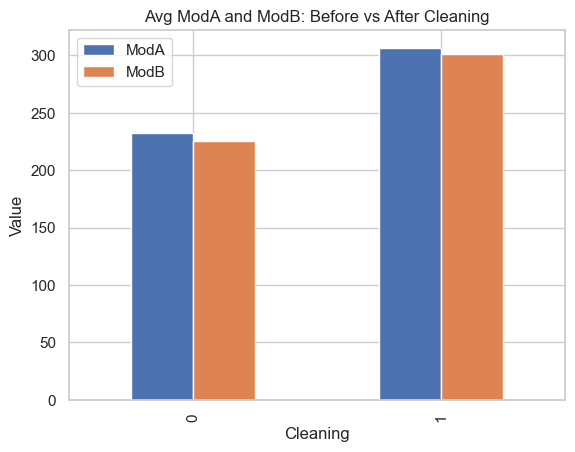

In [ ]:
df_clean['Cleaning'] = df_clean['Cleaning'].astype(str)  
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Avg ModA and ModB: Before vs After Cleaning')
plt.ylabel('Value')
plt.show()


Correlation & Relationship Analysis

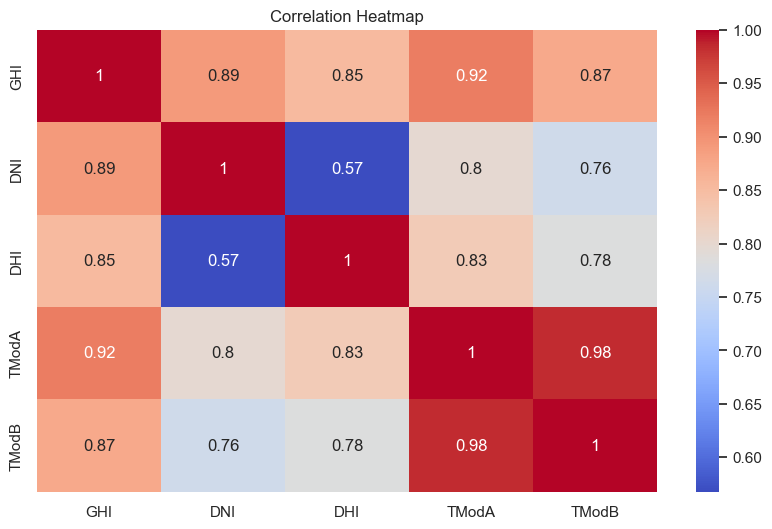

In [ ]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


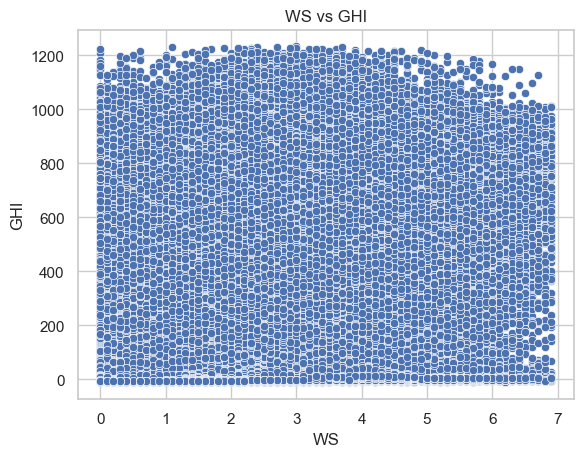

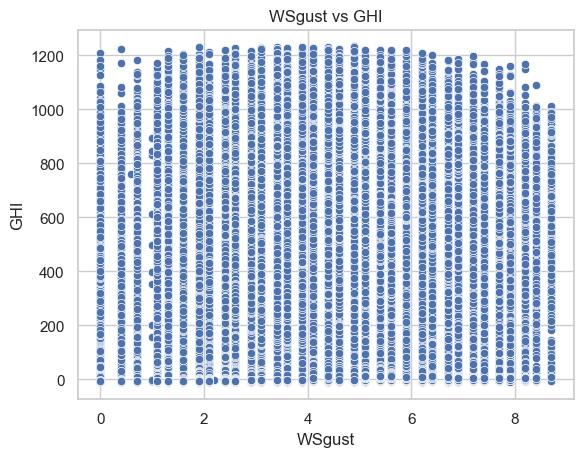

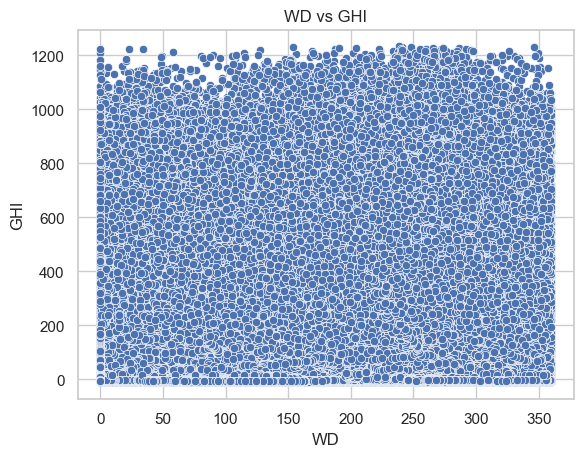

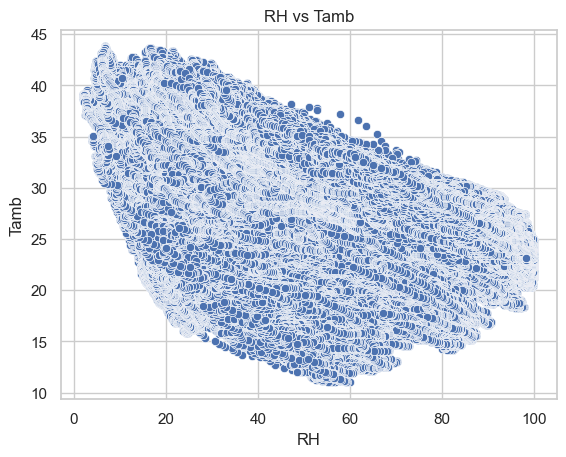

In [ ]:
sns.scatterplot(x='WS', y='GHI', data=df_clean)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x='WSgust', y='GHI', data=df_clean)
plt.title("WSgust vs GHI")
plt.show()

sns.scatterplot(x='WD', y='GHI', data=df_clean)
plt.title("WD vs GHI")
plt.show()

sns.scatterplot(x='RH', y='Tamb', data=df_clean)
plt.title("RH vs Tamb")
plt.show()


Wind & Distribution Analysis

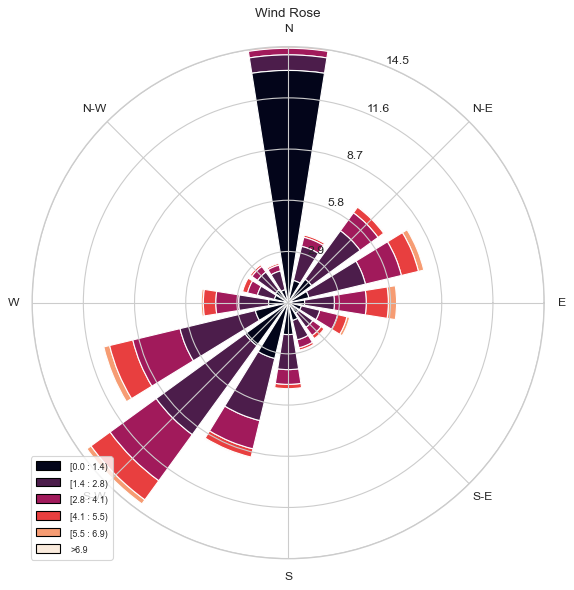

In [ ]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df_clean['WD'], df_clean['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()

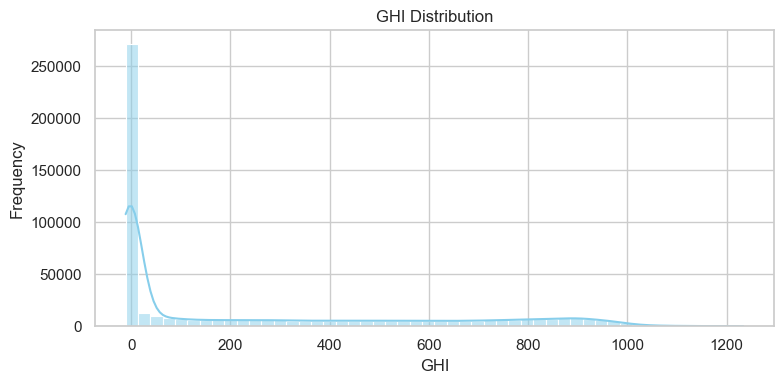

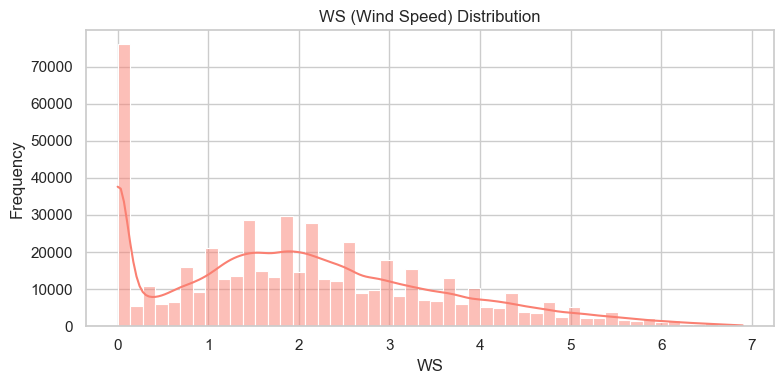

In [ ]:
# Set style for better aesthetics
sns.set(style="whitegrid")

# Plot GHI distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['GHI'], bins=50, kde=True, color='skyblue')
plt.title('GHI Distribution')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot WS distribution
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['WS'], bins=50, kde=True, color='salmon')
plt.title('WS (Wind Speed) Distribution')
plt.xlabel('WS')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()